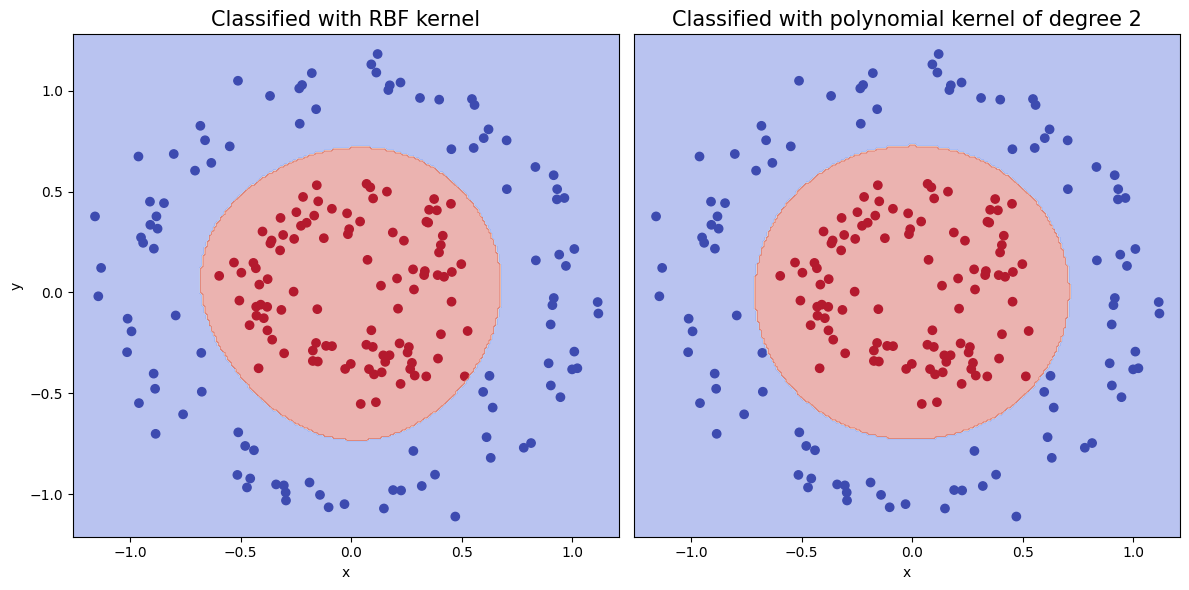

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# Generate non-separable data using make_circles
X, y = make_circles(n_samples=200, noise=0.1, factor=0.4, random_state=42)

# Apply RBF kernel transformation
gamma = 0.1  # Kernel parameter
X_transformed = np.exp(-gamma * np.sum(X**2, axis=1))[:, np.newaxis]

# Train SVM classifier on the transformed data
svm = SVC(kernel='rbf')
svm.fit(X, y)

svm_poly = SVC(kernel="poly", degree=2)
svm_poly.fit(X, y)

# Define range for plotting
plot_step = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Z2 = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot original data
axs[0].scatter(X[:, 0], X[:, 1], c=np.abs(1-y), cmap=plt.cm.RdYlBu)
axs[0].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Classified with RBF kernel', size=15)

# Plot transformed data
axs[1].scatter(X[:, 0], X[:,1], c=np.abs(1-y), cmap=plt.cm.RdYlBu)
axs[1].contourf(xx, yy, Z2, alpha=0.4, cmap=plt.cm.coolwarm)
axs[1].set_xlabel('x')
axs[1].set_yticks([])
axs[1].set_title('Classified with polynomial kernel of degree 2', size=15)


plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
<ipython-input-26-a83a2aa75a72>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


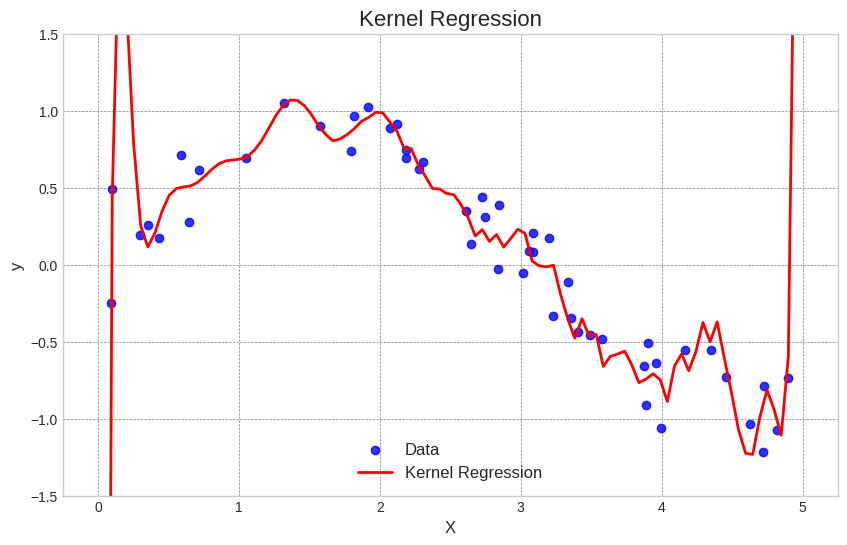

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.kernel_ridge import KernelRidge

# Generate some random data points with noise
np.random.seed(0)
X = np.sort(5 * np.random.rand(50, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Fit kernel regression model
krr = KernelRidge(alpha=0.0, kernel='rbf', gamma=1)
krr.fit(X, y)

# Generate points for plotting the regression function
X_plot = np.linspace(0, 5, 100)[:, None]
y_plot = krr.predict(X_plot)

# Create a larger and more visually appealing plot
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')

# Plot the data points and regression function
plt.scatter(X, y, color='blue', label='Data', alpha=0.8)
plt.plot(X_plot, y_plot, color='red', label='Kernel Regression', linewidth=2)

# Set plot title and axis labels
plt.title('Kernel Regression', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)

# Customize tick labels and grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.ylim(-1.5,1.5)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()


<ipython-input-27-da8d48794ee6>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


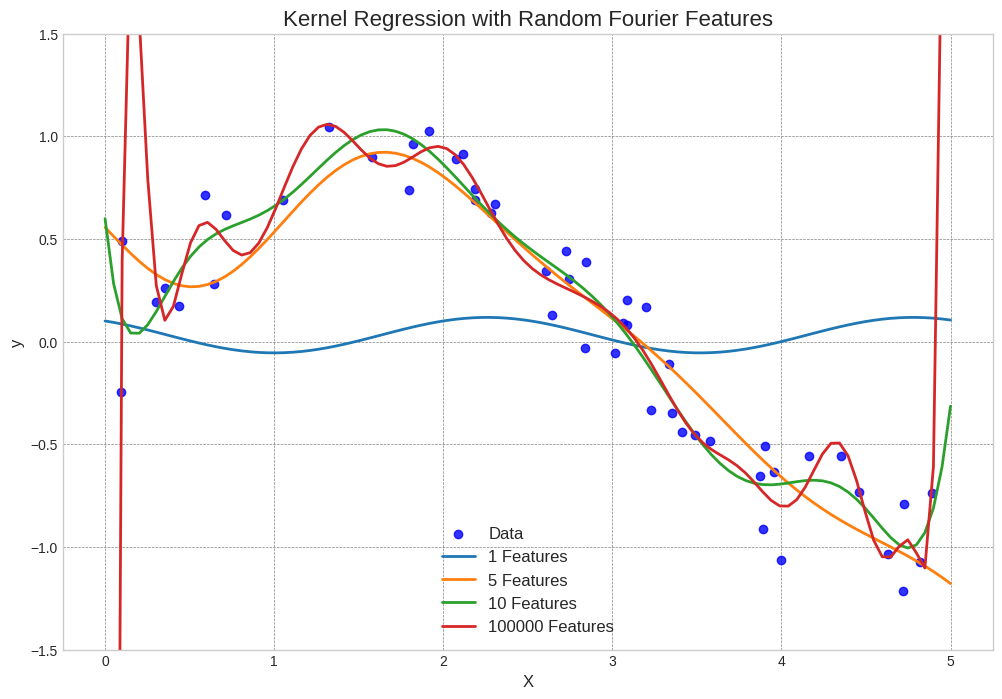

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import Ridge

# Generate some random data points with noise
np.random.seed(0)


# Number of random features to use
num_features = [1, 5, 10, 100000]

# Create a larger and more visually appealing plot
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-whitegrid')

# Plot the original data points
plt.scatter(X, y, color='blue', label='Data', alpha=0.8)

# Generate points for plotting the regression functions
X_plot = np.linspace(0, 5, 100)[:, None]

# Perform regression with different numbers of random features
for i, num in enumerate(num_features):
    # Random Fourier features
    rbf_feature = RBFSampler(gamma=1, n_components=num, random_state=0)
    X_features = rbf_feature.fit_transform(X)
    X_plot_features = rbf_feature.transform(X_plot)

    # Ridge regression
    ridge = Ridge(alpha=0)
    ridge.fit(X_features, y)

    # Predict using the fitted model
    y_plot = ridge.predict(X_plot_features)

    # Plot the regression function
    plt.plot(X_plot, y_plot, label=f'{num} Features', linewidth=2)

# Set plot title and axis labels
plt.title('Kernel Regression with Random Fourier Features', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)

# Customize tick labels and grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.ylim(-1.5,1.5)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Sample data from a Gaussian distribution
np.random.seed(0)
mean1 = [2, 4]
cov1 = [[0.3, 0.2], [0.2, 0.4]]
data1 = np.random.multivariate_normal(mean1, cov1, 50)
label1 = np.full(data1.shape[0], -1)

mean2 = [3, 1]
cov2 = [[0.2, 0.1], [0.1, 0.3]]
data2 = np.random.multivariate_normal(mean2, cov2, 50)
label2 = np.full(data2.shape[0], 1)

# Combine the data and labels
X = np.concatenate((data1, data2))
y = np.concatenate((label1, label2))


<ipython-input-2-6f4d2e8c3ca5>:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(xx_hyper, yy_hyper, 'k--', color = "red", label = "sub optimal Hyperplane")


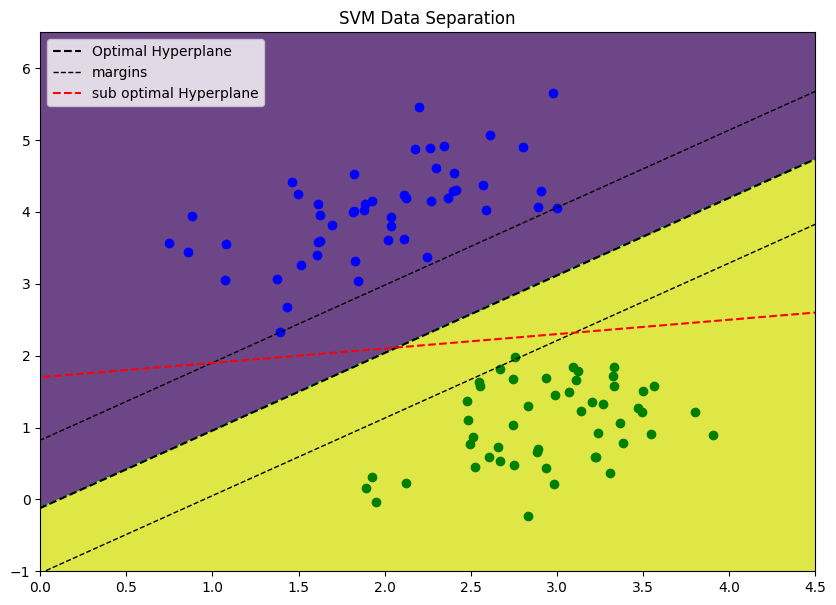

In [2]:
# SVM model
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Generate grid points to plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize = (10,7))

# Plot the decision boundary and margins
ax.contourf(xx, yy, Z, alpha=0.8)
ax.scatter(data1[:, 0], data1[:, 1], c='blue')
ax.scatter(data2[:, 0], data2[:, 1], c='green' )

# Plot the optimal hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx_hyper = np.linspace(x_min, x_max)
yy_hyper = a * xx_hyper - (model.intercept_[0]) / w[1]
ax.plot(xx_hyper, yy_hyper, 'k--', label='Optimal Hyperplane')

# Plot the optimal hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx_hyper = np.linspace(x_min, x_max)
yy_hyper = a * xx_hyper - (model.intercept_[0]-0.96) / w[1]
ax.plot(xx_hyper, yy_hyper, 'k--', linewidth = 1)

# Plot the optimal hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx_hyper = np.linspace(x_min, x_max)
yy_hyper = a * xx_hyper - (model.intercept_[0]+1) / w[1]
ax.plot(xx_hyper, yy_hyper, 'k--', linewidth = 1, label = "margins")

# Plot the non optimal hyperplane
w = [-0.2, 1]
a = -w[0] / w[1]
xx_hyper = np.linspace(x_min, x_max)
yy_hyper = (a * xx_hyper +1.7 ) / w[1]
ax.plot(xx_hyper, yy_hyper, 'k--', color = "red", label = "sub optimal Hyperplane")

ax.set_xlim(0,4.5)
ax.set_ylim(-1,6.5)

plt.legend()
plt.title('SVM Data Separation')
plt.show()

